# Transfer Learning : Data Augmentation(Feature Extraction)

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d salader/dogs-vs-cats

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 71.5MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s] 


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
conv_base.trainable = False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8901 - loss: 0.2501 - val_accuracy: 0.9142 - val_loss: 0.2021
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9018 - loss: 0.2262 - val_accuracy: 0.9074 - val_loss: 0.2130
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.9056 - loss: 0.2167 - val_accuracy: 0.9190 - val_loss: 0.1900
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 250ms/step - accuracy: 0.9158 - loss: 0.2017 - val_accuracy: 0.9182 - val_loss: 0.1905
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.9192 - loss: 0.1957 - val_accuracy: 0.9190 - val_loss: 0.1866


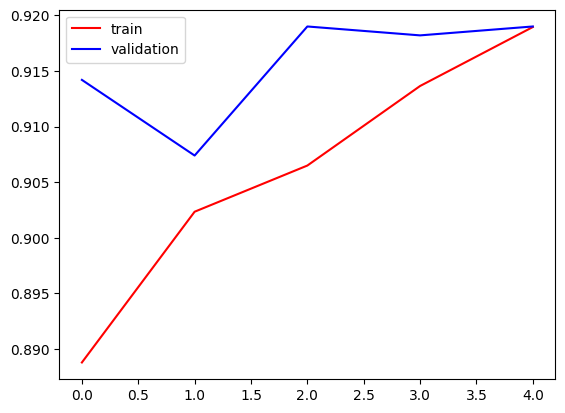

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

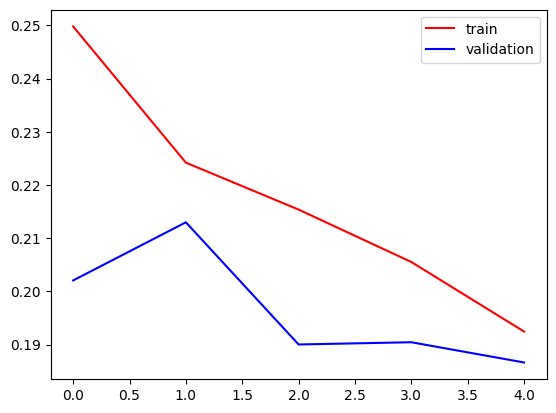

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()